# Title:

## Predicting Extend of Heart Disease with Classification

# Introduction:

For my project proposal, I will be using a modified version of the UCI Heart Disease dataset provided by DSCI100. The UCI Heart Disease dataset includes four databases of the countries: Cleveland, Hungary, Switzerland, and the VA Long Beach. I will be using Cleveland for my prediction because the dataframe has the most observations out of the four options, as a larger dataset should lead to a better model. The Heart Disease Cleveland dataframe includes the variables: "trestbps" and "thalach", which I will be using to predict the variable of interest: "num". In the dataframe, "trestbps" refers to the resting blood pressure on admission to the hospital measured in mm Hg, while "thalach" refers to maximum heart rate achieved measured in bps, and "num" means the diagnosis of heart disease with a value of: 0 means no heart disease, 1-4 referring to various levels of heart disease (Classified as 1: Mild, 2: Moderate, 3: Severe 4: Life threatening). With these resources, I will be answering the question: Can I predict the extent of heart disease through classification using the variables resting blood pressure and maximum heart rate achieved?

In [1]:
library(tidyverse)
library(tidymodels)
library(repr)
options(repr.matrix.max.rows = 6)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

# Methods and Results:

## Reading data
To load the Cleveland Heart Disease data, we want to load from the internet as it is reproducible, to do this we can assign the url to a variable `url` and use `read_csv` to read from it.

In [2]:
# Read data here: 
url <- "https://raw.githubusercontent.com/UBC-DSCI/dsci-100-project_template/main/data/heart_disease/processed.cleveland.data"
cleveland_data <- read_csv(url)

title <- "Table 1: Cleveland Heart Disease Data (Untidy)"
cat("\n", title, "\n")

cleveland_data

New names:
• `1.0` -> `1.0...2`
• `1.0` -> `1.0...3`
• `1.0` -> `1.0...6`
• `0.0` -> `0.0...9`
• `0.0` -> `0.0...12`
Rows: 302 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): 0.0...12, 6.0
dbl (12): 63.0, 1.0...2, 1.0...3, 145.0, 233.0, 1.0...6, 2.0, 150.0, 0.0...9...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



 Table 1: Cleveland Heart Disease Data (Untidy) 


63.0,1.0...2,1.0...3,145.0,233.0,1.0...6,2.0,150.0,0.0...9,2.3,3.0,0.0...12,6.0,0
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


## Data Wrangling

As you can see right now, the data currently is incomprehensible we must clean and wrangle the data to be something that we can understand. The first part of this is to assign correct column names as stated on the UCI website (https://archive.ics.uci.edu/dataset/45/heart+disease). To do this, we will run the `colnames` function on our dataframe.

In [3]:
colnames(cleveland_data) <- c('age','sex','cp','trestbps','chol','fbs', 'restcg', 
                              'thalach','exang','oldpeak','slope','ca','thal','num')

title <- "Table 2: Cleveland Heart Disease Data with Column Names"
cat("\n", title, "\n")

cleveland_data


 Table 2: Cleveland Heart Disease Data with Column Names 


age,sex,cp,trestbps,chol,fbs,restcg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


Now that we have the correct column names in place we need to convert the variable type of the columns to match the UCI website. To do this, we will use the mutate function in combination with `as.numeric` to convert to dbl, `as_factor` to convert to fct and `fct_recode` to rename the values for variables.

In [4]:

cleveland_clean <- cleveland_data |>
                    mutate(age = as.numeric(age), sex = as_factor(sex), cp = as_factor(cp),
                           trestbps = as.numeric(trestbps), chol = as.numeric(chol), fbs = as_factor(fbs),
                           restcg = as_factor(restcg), thalach = as.numeric(thalach), exang = as_factor(exang),
                           oldpeak = as.numeric(oldpeak), slope = as.numeric(slope), ca = as.numeric(ca),
                           thal = as_factor(thal), num = as.factor(num)) |>
                    mutate(sex = fct_recode(sex, "male" = "1", "female" = "0"),
                           num = fct_recode(num, "No heart disease" = "0", "Mild"="1", "Moderate" = "2",
                                            "Serious" = "3", "Life threatening" = "4"))

title <- "Table 3: Cleveland Heart Disease Data (Tidy)"
cat("\n", title, "\n")

cleveland_clean

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `ca = as.numeric(ca)`.
Caused by warning:
! NAs introduced by coercion”



 Table 3: Cleveland Heart Disease Data (Tidy) 


age,sex,cp,trestbps,chol,fbs,restcg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
67,male,4,160,286,0,2,108,1,1.5,2,3,3.0,Moderate
67,male,4,120,229,0,2,129,1,2.6,2,2,7.0,Mild
37,male,3,130,250,0,0,187,0,3.5,3,0,3.0,No heart disease
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,male,4,130,131,0,0,115,1,1.2,2,1,7.0,Serious
57,female,2,130,236,0,2,174,0,0.0,2,1,3.0,Mild
38,male,3,138,175,0,0,173,0,0.0,1,NA,3.0,No heart disease


Now that we have cleaned the data we can use the `select` function to only show the predictor variables `trestbps`, `thalach`, and the variable of interest `num`.

In [5]:
cleveland_clean_select <- cleveland_clean |> select(trestbps, thalach, num)

title <- "Table 4: Cleveland Heart Disease Data with Only Crucial Variables"
cat("\n", title, "\n")

cleveland_clean_select


 Table 4: Cleveland Heart Disease Data with Only Crucial Variables 


trestbps,thalach,num
<dbl>,<dbl>,<fct>
160,108,Moderate
120,129,Mild
130,187,No heart disease
⋮,⋮,⋮
130,115,Serious
130,174,Mild
138,173,No heart disease


## Splitting Data
After selecting the columns we are interested in, we need to split the data into training and testing sets, using 75% of the data for training and saving the other 25% for testing. We also use the `set.seed` function so the results are reproducible.

In [6]:
set.seed(1)
cleveland_split <- initial_split(cleveland_clean_select, prop = 0.75, strata = num)
cleveland_train <- training(cleveland_split)
cleveland_test <- testing(cleveland_split)

title <- "Table 5: Cleveland Heart Disease Training Data"
cat("\n", title, "\n")

cleveland_train

title <- "Table 6: Cleveland Heart Disease Testing Data"
cat("\n", title, "\n")

cleveland_test


 Table 5: Cleveland Heart Disease Training Data 


trestbps,thalach,num
<dbl>,<dbl>,<fct>
140,155,Mild
140,158,Mild
150,112,Mild
⋮,⋮,⋮
128,130,Serious
164,90,Serious
130,115,Serious



 Table 6: Cleveland Heart Disease Testing Data 


trestbps,thalach,num
<dbl>,<dbl>,<fct>
120,129,Mild
120,178,No heart disease
120,163,No heart disease
⋮,⋮,⋮
134,162,Mild
140,144,Moderate
144,141,Moderate


## Preliminary Plot

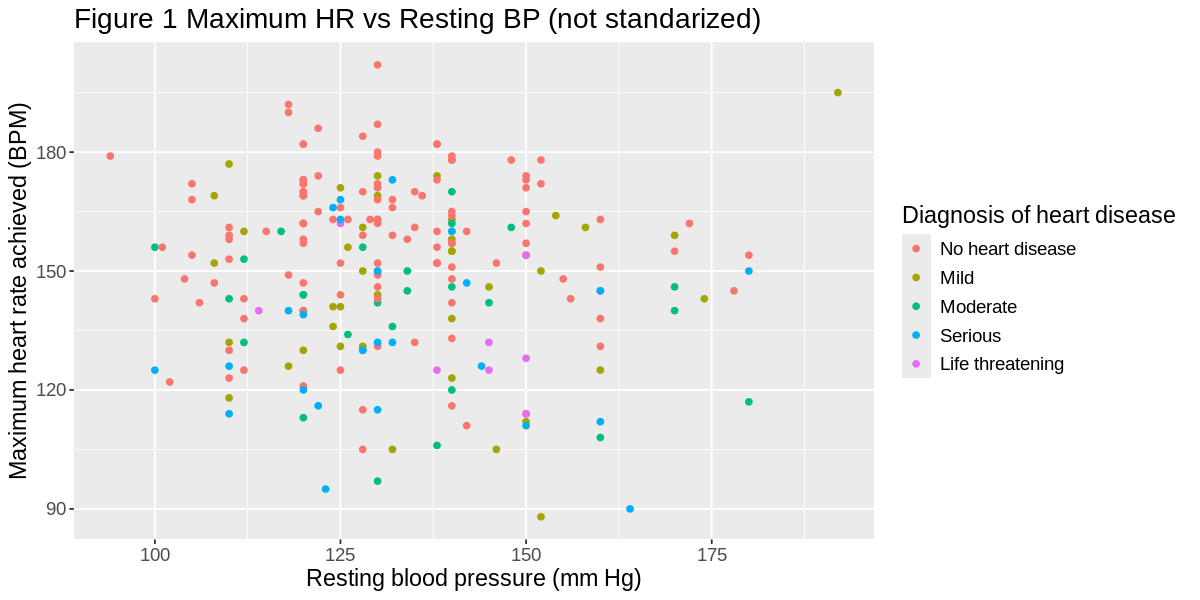

In [7]:
options(repr.plot.width = 10, repr.plot.height =5)


cleveland_train_plot <- cleveland_train |>
                        ggplot(aes(x = trestbps, y = thalach, color = num)) +
                        geom_point() +
                        labs(x = "Resting blood pressure (mm Hg)",y = "Maximum heart rate achieved (BPM)", 
                             color = "Diagnosis of heart disease", title = "Figure 1 Maximum HR vs Resting BP (not standarized)") +
                        theme(text = element_text(size = 14))

cleveland_train_plot

The preliminary plot does not seem to show any trends between the data but we need to standardize the parameters to know for certain.

## Standardize Parameters

to standardize data we need to create a recipe to scale the values `cleaveland`

In [8]:
set.seed(1)

#Set table title of non standardized table (to show it's not been standardized)
title <- "Table 7: Means and Standard Deviations in Training Data"
cat("\n", title, "\n")

cleveland_stats <- cleveland_train |>
    summarize(trestbps_mean = mean(trestbps),
              thalach_mean = mean(thalach),
              trestbps_sd = sd(trestbps),
              thalach_sd = sd(thalach)) |>
              pivot_longer(cols = trestbps_mean:thalach_sd,
                  names_to = "statistic",
                  values_to = "value")

cleveland_stats


cleveland_recipe <- recipe(num ~ ., data = cleveland_train)|> 
                    step_scale(all_predictors()) |> 
                    step_center(all_predictors()) |>
                    prep()

scaled_data <- bake(cleveland_recipe, cleveland_train)

#Set table title of standardized table (to show it's been standardized)
title <- "Table 8: Means and Standard Deviations in Standardized Data"
cat("\n", title, "\n")

standardized_stats <- scaled_data|>
    summarize(trestbps_mean = mean(trestbps),
              thalach_mean = mean(thalach),
              trestbps_sd = sd(trestbps),
              thalach_sd = sd(thalach)) |>
              pivot_longer(cols = trestbps_mean:thalach_sd,
                  names_to = "statistic",
                  values_to = "value")

standardized_stats


 Table 7: Means and Standard Deviations in Training Data 


statistic,value
<chr>,<dbl>
trestbps_mean,132.61062
thalach_mean,149.94248
trestbps_sd,17.49231
thalach_sd,21.48656



 Table 8: Means and Standard Deviations in Standardized Data 


statistic,value
<chr>,<dbl>
trestbps_mean,1.572813e-16
thalach_mean,-4.244004e-16
trestbps_sd,1.000000e+00
thalach_sd,1.000000e+00


As shown in tables 7 and 8, by creating a `recipe` and using the functions `step_scale` and `step_center` as well as `prep` and `bake` we have been able to standardize the data indicated by the standard deviation values being `1`

## Choosing K for KNN Classification and finding highest accuracy

Since I will be using K nearest neighbor classification model, I want to first find how many K neighbors would achieve the highest accuracy

To do this I will have to:

- First use the `nearest_neighbor` function to create the model and set `neighbor = tune()` to find best neighbors. Also set engine to `kknn` and mode to `classification`
- Then I have to use the `vfold_cv` function to perform 5-fold cross-validation. By performing 5-fold cross-validation, we are tuning our model to evaluate performance with different splits to ensure the model generalizes to new data
- To test which K neighbors will work best, I created `tibble` with a range from 1 to 75 increasing by 1, this is how many K's we will be testing
- To visualize which K is best, I did a line plot of the Prediction Accuracy vs K which found that K = 50 gave the highest accuracy.

In [9]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbor = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")
knn_spec

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


List of 1
 $ text:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 12
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

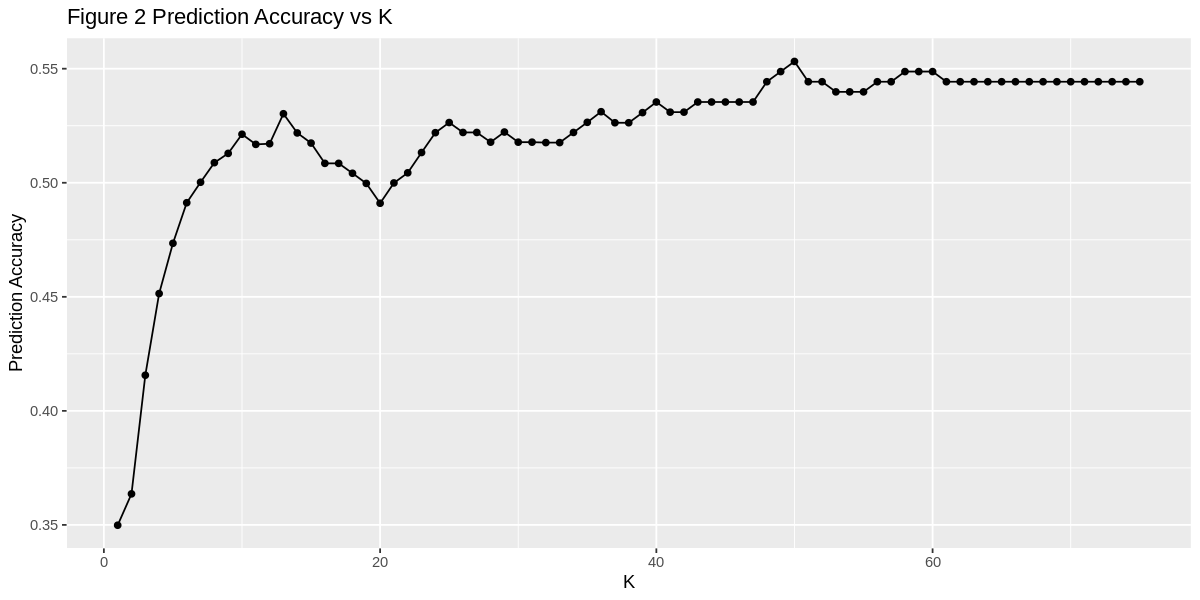

In [10]:
set.seed(1)

training_vfold <- vfold_cv(cleveland_train, v = 5, strata = num)

grid_k <- tibble(neighbors = seq(from = 1, to = 75, by = 1))

knn_results <- workflow() |> 
                add_recipe(cleveland_recipe) |>
                add_model(knn_spec) |> 
                tune_grid(resamples = training_vfold, grid = grid_k) |>
                collect_metrics() |> 
                filter(.metric == 'accuracy')

cross_val_plot <- knn_results |> 
                    ggplot(aes(x = neighbors, y = mean)) + 
                        geom_point() +
                        geom_line() +
                        labs(x = "K", y = "Prediction Accuracy", title = "Figure 2 Prediction Accuracy vs K")
                        theme(text = element_text(size = 12))

cross_val_plot

In [11]:
accuracy <- knn_results |>
    filter(.metric == "accuracy") |>
    arrange(-mean) |> 
    head(1)

title <- "Table 9: Best K by Accuracy"
cat("\n", title, "\n")

accuracy


 Table 9: Best K by Accuracy 


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
50,accuracy,multiclass,0.5531841,5,0.007475499,Preprocessor1_Model50


## Evaluating Performance

- Now that we have our classification model with the best K, we want to test this against our test data by having our model predict the severity of heart disease using the predictor variables `trestbps` and `thalach`. I can do this by running the `predict` function.

- As I predict the test data, I also want to see how good the model is at predicting, to do this we will run `filter`, `precision`, and `recall` to find the accuracy, precision and recall of our model.
  
- I will also run the function `conf_mat` to see a matrix of predictions as it can reveal details of the kind of mistakes the model is making

In [12]:
cleveland_recipe <- recipe(num ~ ., data = cleveland_train)|> 
                    step_scale(all_predictors()) |> 
                    step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbor = 50) |>
    set_engine("kknn") |>
    set_mode("classification")

knn_fit <- workflow() |>
  add_recipe(cleveland_recipe) |>
  add_model(knn_spec) |>
  fit(data = cleveland_train)

knn_fit

heart_disease_test_predictions <- predict(knn_fit, cleveland_test) |>
  bind_cols(cleveland_test)

title <- "Table 10: Accuracy of Predictions"
cat("\n", title, "\n")

heart_disease_test_predictions |>
  metrics(truth = num, estimate = .pred_class) |>
  filter(.metric == "accuracy")

title <- "Table 11: Percision of Predictions"
cat("\n", title, "\n")

heart_disease_test_predictions |>
    precision(truth = num, estimate = .pred_class, event_level="first")

title <- "Table 12: Recall of Predictions"
cat("\n", title, "\n")

heart_disease_test_predictions |>
    recall(truth = num, estimate = .pred_class, event_level="first")

title <- "Table 13: Confusion Matrix of Predictions"
cat("\n", title, "\n")

matrix <- heart_disease_test_predictions |>
             conf_mat(truth = num, estimate = .pred_class)
matrix

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(50,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.460177
Best kernel: rectangular
Best k: 50


 Table 10: Accuracy of Predictions 


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.5394737



 Table 11: Percision of Predictions 


Warning message:
“While computing multiclass `precision()`, some levels had no predicted events (i.e. `true_positive + false_positive = 0`). 
Precision is undefined in this case, and those levels will be removed from the averaged result.
Note that the following number of true events actually occured for each problematic event level:
'Mild': 14
'Moderate': 10
'Life threatening': 3”


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,macro,0.4746479



 Table 12: Recall of Predictions 


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,macro,0.2394444



 Table 13: Confusion Matrix of Predictions 


                  Truth
Prediction         No heart disease Mild Moderate Serious Life threatening
  No heart disease               39   13        9       7                3
  Mild                            0    0        0       0                0
  Moderate                        0    0        0       0                0
  Serious                         1    1        1       2                0
  Life threatening                0    0        0       0                0

# Visualization

To visualize how successful my model has been, I will plot the test data right above the prediction for test data. Having these next to eachother will allow us to see if the model was able to accurately predict the severity of heart disease.


 Table 14: Scaled Test Data 


trestbps,thalach,num
<dbl>,<dbl>,<fct>
-0.4938606,-0.7303194,Mild
-0.4938606,1.0949890,No heart disease
-0.4938606,0.5362211,No heart disease
⋮,⋮,⋮
0.2939470,0.4989699,Mild
0.6315788,-0.1715515,Moderate
0.8566667,-0.2833051,Moderate



 Table 15: Scaled Predicted Test Data 


trestbps,thalach,.pred_class
<dbl>,<dbl>,<fct>
-0.4938606,-0.7303194,No heart disease
-0.4938606,1.0949890,No heart disease
-0.4938606,0.5362211,No heart disease
⋮,⋮,⋮
0.2939470,0.4989699,No heart disease
0.6315788,-0.1715515,No heart disease
0.8566667,-0.2833051,No heart disease


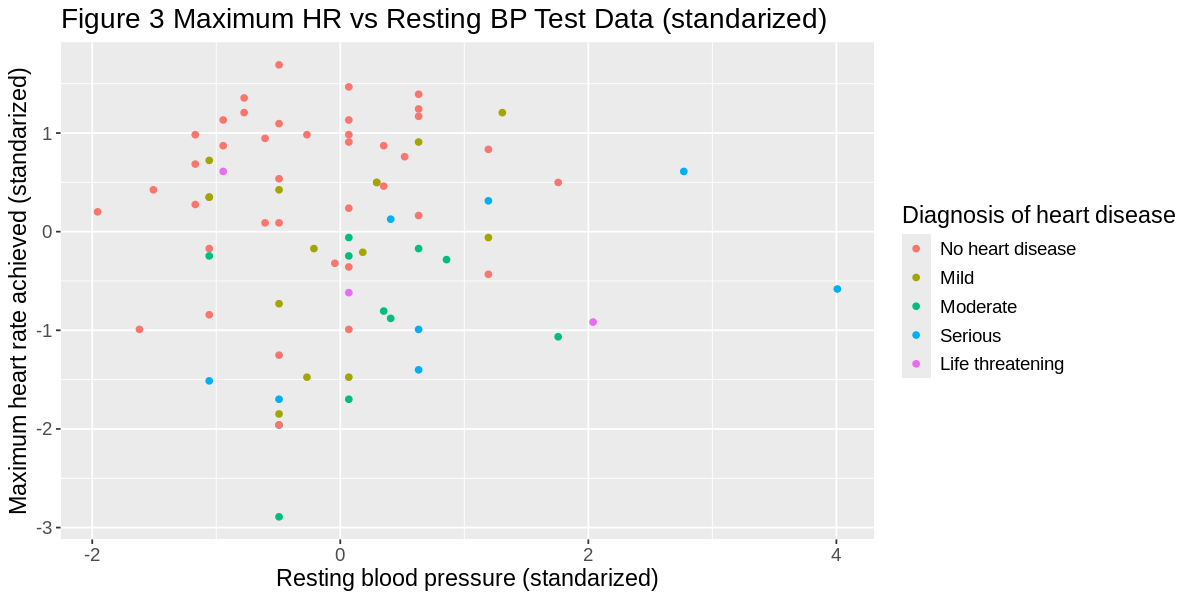

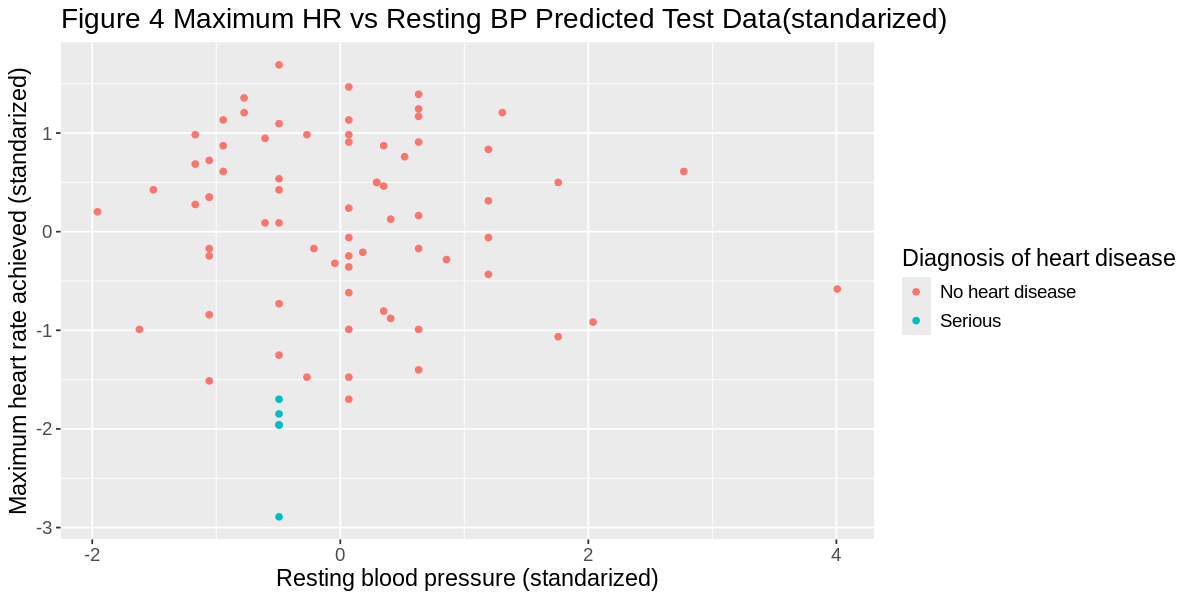

In [13]:
cleveland_recipe_test <- recipe(num ~ ., data = cleveland_test)|> 
                         step_scale(all_predictors()) |> 
                         step_center(all_predictors()) |>
                         prep()

cleveland_recipe_test_predict <- recipe(.pred_class ~ trestbps + thalach, data = heart_disease_test_predictions)|> 
                         step_scale(all_predictors()) |> 
                         step_center(all_predictors()) |>
                         prep()

scaled_test_data <- bake(cleveland_recipe_test, cleveland_test)

title <- "Table 14: Scaled Test Data"
cat("\n", title, "\n")

scaled_test_data

scaled_test_predict_data <- bake(cleveland_recipe_test_predict, heart_disease_test_predictions)

title <- "Table 15: Scaled Predicted Test Data"
cat("\n", title, "\n")

scaled_test_predict_data


cleveland_test_plot <- scaled_test_data |>
                        ggplot(aes(x = trestbps, y = thalach, color = num)) +
                        geom_point() +
                        labs(x = "Resting blood pressure (standarized)",y = "Maximum heart rate achieved (standarized)", 
                             color = "Diagnosis of heart disease", title = "Figure 3 Maximum HR vs Resting BP Test Data (standarized)") +
                        theme(text = element_text(size = 14))

cleveland_test_plot

cleveland_test_predict_plot <- scaled_test_predict_data |>
                        ggplot(aes(x = trestbps, y = thalach, color = .pred_class)) +
                        geom_point() +
                        labs(x = "Resting blood pressure (standarized)",y = "Maximum heart rate achieved (standarized)", 
                             color = "Diagnosis of heart disease", title = "Figure 4 Maximum HR vs Resting BP Predicted Test Data(standarized)") +
                        theme(text = element_text(size = 14))

cleveland_test_predict_plot

# Discussion:

After spending hours working on this K nearest neighbors classification model, I can conclude that with a recall of 24% I have found that I cannot predict the extent of heart disease through classification using the variables resting blood pressure and maximum heart rate achieved. Not to mention the visualization above shows that the k nearest neighbors algorithm almost only predicts "No heart disease". This was not quite what I expected as I thought that blood pressure and maximum heart rate achieved would be able to predict heart disease to a certain extend. A study by Zhang and colleagues found that the risk of cardiovascular disease increased significantly when paired with high normal blood pressure (e333). My findings could impact our current understanding of how heart disease is impacted by resting blood pressure and maximum heart rate achieved as I was unable to find a K nearest neighbors classification model to predict severity of heart disease with resting blood pressure and maximum heart rate achieved. This could lead to future questions such as would another model be able to predict the severity of heart disease using resting blood pressure and maximum heart rate achieved or if different predictor variables would be able to accurately predict severity of heart disease. Further findings around this topic could impact new technologies being developed such as in the paper Heart Disease Detection by Using Machine Learning Algorithms and a Real-Time Cardiovascular Health Monitoring System by Nashif and colleagues where they were able to develop a machine learning classification model that could predict heart disease with over 95 percent accuracy (870).

## References

- Janosi, Andras, Steinbrunn, William, Pfisterer, Matthias, and Detrano,Robert. (1988). Heart Disease. UCI Machine Learning Repository. https://doi.org/10.24432/C52P4X.

- Nashif, S., Raihan, 
Md.R., Islam, Md.R. and Imam, M.H 
(2018) Heart Disease Detection by Usin 
Machine Learning Algorithms anda 
Real-Time Cardiovascular Health Monitoring System. World Journa  of Engieering and Technology, 6, 854- 73.
https://doi.org/10.4236/wjet.2018.64057

- Zhang, Ningning, et al. "A14957 Association of resting heart rate with cardiovascular disease varies by blood pressure levels". Journal of Hypertension, vol. 36, October 2018, pp. e333. doi: 10.1097/01.hjh.0000549363.02049.d3.l.